# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_21_run3/result-lstm-tcp21-hl2-seq2-do0.2-oov3000-part_5_Treatment_testing_21.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_21/part_5_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.19-59063-192.168.10.50-21-tcp,0.379310,0,0,0,6312.388235,0,0,0
1,192.168.10.15-53283-192.168.10.50-21-tcp,0.367816,0,0,0,5286.670588,0,0,0
2,192.168.10.5-56862-192.168.10.50-21-tcp,0.356322,0,0,0,8545.458824,0,0,0
3,192.168.10.14-59015-192.168.10.50-21-tcp,0.298851,0,0,0,5847.941176,0,0,0
4,192.168.10.19-58060-192.168.10.50-21-tcp,0.379310,0,0,0,6361.082353,0,0,0


In [4]:
df_truth.head()

,ID,Label
0,192.168.10.19-59063-192.168.10.50-21-tcp,BENIGN
1,192.168.10.15-53283-192.168.10.50-21-tcp,BENIGN
2,192.168.10.5-56862-192.168.10.50-21-tcp,BENIGN
3,192.168.10.14-59015-192.168.10.50-21-tcp,BENIGN
4,192.168.10.19-58060-192.168.10.50-21-tcp,BENIGN


In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        573
1         64
Name: count, dtype: int64

## Exploratory Data Analysis

In [6]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        573
1         64
Name: count, dtype: int64

In [7]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           625
1            12
Name: count, dtype: int64

In [8]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [9]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [10]:
df_pred["id"]

0      192.168.10.19-59063-192.168.10.50-21-tcp
1      192.168.10.15-53283-192.168.10.50-21-tcp
2       192.168.10.5-56862-192.168.10.50-21-tcp
3      192.168.10.14-59015-192.168.10.50-21-tcp
4      192.168.10.19-58060-192.168.10.50-21-tcp
                         ...                   
632    192.168.10.16-47672-192.168.10.50-21-tcp
633    192.168.10.16-54174-192.168.10.50-21-tcp
634      192.168.10.9-2314-192.168.10.50-21-tcp
635    192.168.10.14-59458-192.168.10.50-21-tcp
636    192.168.10.17-48436-192.168.10.50-21-tcp
Name: id, Length: 637, dtype: object

In [11]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0      192.168.10.19-59063-192.168.10.50-21-tcp
1      192.168.10.15-53283-192.168.10.50-21-tcp
2       192.168.10.5-56862-192.168.10.50-21-tcp
3      192.168.10.14-59015-192.168.10.50-21-tcp
4      192.168.10.19-58060-192.168.10.50-21-tcp
                         ...                   
632    192.168.10.16-47672-192.168.10.50-21-tcp
633    192.168.10.16-54174-192.168.10.50-21-tcp
634      192.168.10.9-2314-192.168.10.50-21-tcp
635    192.168.10.14-59458-192.168.10.50-21-tcp
636    192.168.10.17-48436-192.168.10.50-21-tcp
Name: ID, Length: 637, dtype: object

In [12]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [13]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [14]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
85,172.16.0.1-60106-192.168.10.50-21-tcp,0.428571,0,0,0,9567.121212,0,0,0,1
86,172.16.0.1-53110-192.168.10.50-21-tcp,0.432432,0,0,0,4808.600000,0,0,0,1
87,172.16.0.1-58916-192.168.10.50-21-tcp,0.344828,0,0,0,2511.185185,0,0,0,1
88,172.16.0.1-56550-192.168.10.50-21-tcp,0.500000,1,1,0,182199.923077,1,1,1,1
89,172.16.0.1-52506-192.168.10.50-21-tcp,0.378378,0,0,0,62426.600000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
576,172.16.0.1-52776-192.168.10.50-21-tcp,0.393939,0,0,0,279400.677419,1,1,1,1
577,172.16.0.1-58102-192.168.10.50-21-tcp,0.393939,0,0,0,15525.193548,0,0,0,1
578,172.16.0.1-56196-192.168.10.50-21-tcp,0.512821,1,1,1,13536.162162,0,0,0,1
579,172.16.0.1-53006-192.168.10.50-21-tcp,0.343750,0,0,0,4129.866667,0,0,0,1


In [15]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.19-59063-192.168.10.50-21-tcp,0.379310,0,0,0,6312.388235,0,0,0,0
1,192.168.10.15-53283-192.168.10.50-21-tcp,0.367816,0,0,0,5286.670588,0,0,0,0
2,192.168.10.5-56862-192.168.10.50-21-tcp,0.356322,0,0,0,8545.458824,0,0,0,0
3,192.168.10.14-59015-192.168.10.50-21-tcp,0.298851,0,0,0,5847.941176,0,0,0,0
4,192.168.10.19-58060-192.168.10.50-21-tcp,0.379310,0,0,0,6361.082353,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
644,192.168.10.16-47672-192.168.10.50-21-tcp,0.356322,0,0,0,5419.223529,0,0,0,0
645,192.168.10.16-54174-192.168.10.50-21-tcp,0.344828,0,0,0,5393.917647,0,0,0,0
646,192.168.10.9-2314-192.168.10.50-21-tcp,0.356322,0,0,0,4580.352941,0,0,0,0
647,192.168.10.14-59458-192.168.10.50-21-tcp,0.367816,0,0,0,6192.223529,0,0,0,0


In [16]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.19-59063-192.168.10.50-21-tcp,0.379310,0,0,0,6312.388235,0,0,0,0
1,192.168.10.15-53283-192.168.10.50-21-tcp,0.367816,0,0,0,5286.670588,0,0,0,0
2,192.168.10.5-56862-192.168.10.50-21-tcp,0.356322,0,0,0,8545.458824,0,0,0,0
3,192.168.10.14-59015-192.168.10.50-21-tcp,0.298851,0,0,0,5847.941176,0,0,0,0
4,192.168.10.19-58060-192.168.10.50-21-tcp,0.379310,0,0,0,6361.082353,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
644,192.168.10.16-47672-192.168.10.50-21-tcp,0.356322,0,0,0,5419.223529,0,0,0,0
645,192.168.10.16-54174-192.168.10.50-21-tcp,0.344828,0,0,0,5393.917647,0,0,0,0
646,192.168.10.9-2314-192.168.10.50-21-tcp,0.356322,0,0,0,4580.352941,0,0,0,0
647,192.168.10.14-59458-192.168.10.50-21-tcp,0.367816,0,0,0,6192.223529,0,0,0,0


In [17]:
df_pred[['Label']].value_counts()

Label
1        496
0        153
Name: count, dtype: int64

In [18]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [19]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [20]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
644,0
645,0
646,0
647,0


### Detection Rate

In [21]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.1814516129032258
Recall-Binary-b_iqr: 0.12903225806451613
Recall-Binary-b_zscore: 0.024193548387096774
Recall-Floating-f_mean: 0.05846774193548387
Recall-Floating-f_iqr: 0.26411290322580644
Recall-Floating-f_zscore: 0.4153225806451613


### Confussion Matrix

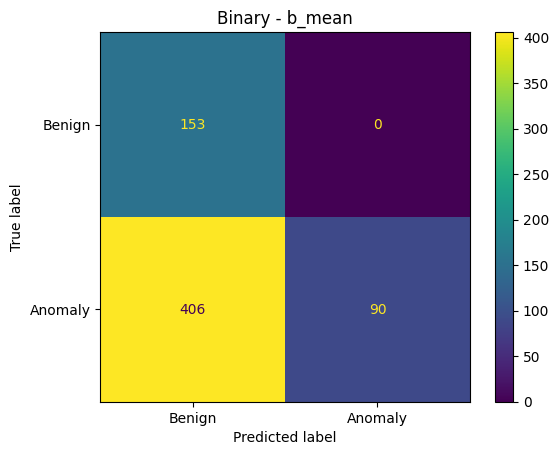

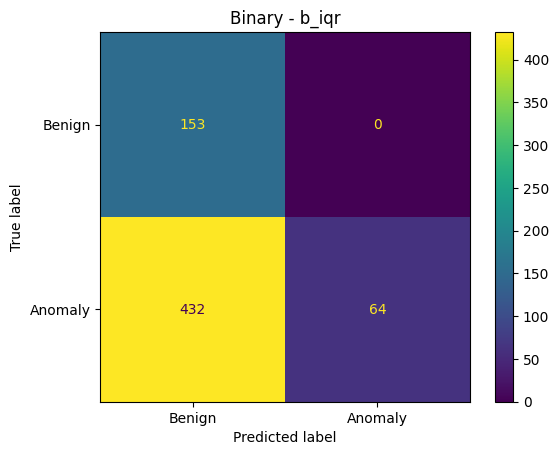

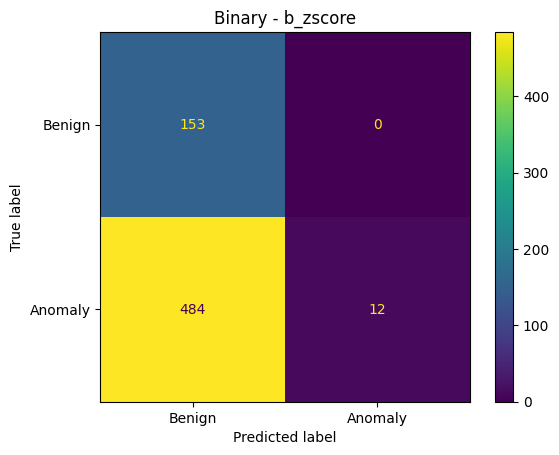

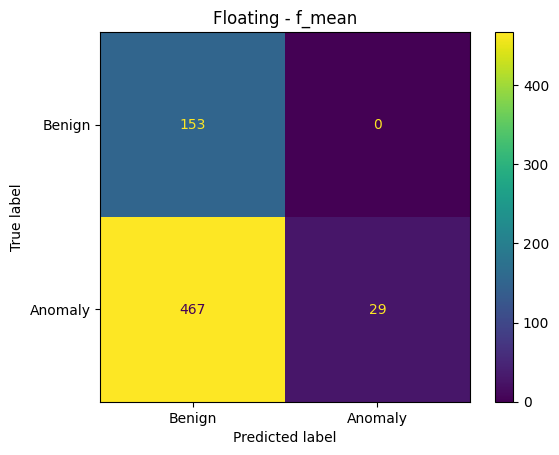

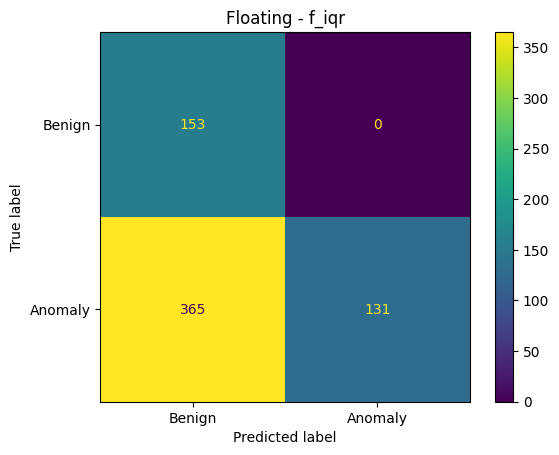

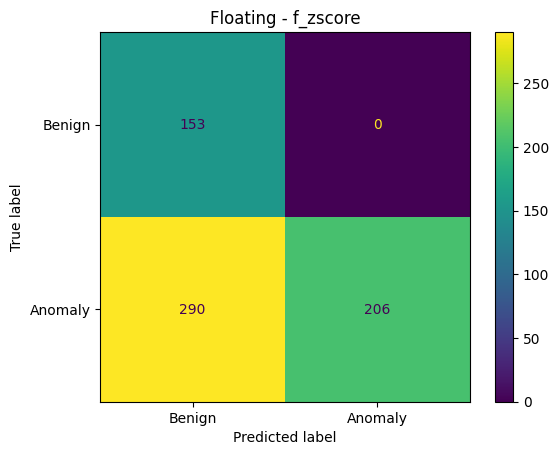

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [23]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.21697203471552556
F2-Binary-b_iqr: 0.15625
F2-Binary-b_zscore: 0.03006012024048096
F2-Floating-f_mean: 0.07203179334326876
F2-Floating-f_iqr: 0.30969267139479906
F2-Floating-f_zscore: 0.4703196347031963


### FPR Score

In [24]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.0
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.0
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0


In [25]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.37442218798151
Accuracy-Binary-b_iqr: 0.33436055469953774
Accuracy-Binary-b_zscore: 0.2542372881355932
Accuracy-Floating-f_mean: 0.28043143297380585
Accuracy-Floating-f_iqr: 0.43759630200308164
Accuracy-Floating-f_zscore: 0.5531587057010786


In [26]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.181452,0.216972,0.0,0.374422
b_iqr,0.129032,0.156250,0.0,0.334361
b_zscore,0.024194,0.030060,0.0,0.254237
f_mean,0.058468,0.072032,0.0,0.280431
f_iqr,0.264113,0.309693,0.0,0.437596
f_zscore,0.415323,0.470320,0.0,0.553159


In [27]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [28]:
# %pip install openpyxl